In [ ]:
import keras
keras.__version__

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [1]:
import pandas as pd

## 입력값, 출력값 정리

In [2]:
train_csv = pd.read_csv('data/20142018_whole.csv')
train_csv = train_csv[['일시', '풍속(m/s)', '풍향(deg)', '유의파고(m)', '평균파고(m)', '파향(deg)', '파주기(sec)', '최대파고(m)']]
train_csv = train_csv.dropna()

In [3]:
test_csv = pd.read_csv('data/2019_whole.csv')
test_csv = test_csv[['일시', '풍속(m/s)', '풍향(deg)', '유의파고(m)', '평균파고(m)', '파향(deg)', '파주기(sec)', '최대파고(m)']]
test_csv = test_csv.dropna()

In [4]:
train_data = train_csv[['풍속(m/s)', '풍향(deg)', '유의파고(m)', '평균파고(m)', '파향(deg)', '파주기(sec)']]
train_data = train_data.values

In [5]:
test_data = test_csv[['풍속(m/s)', '풍향(deg)', '유의파고(m)', '평균파고(m)', '파향(deg)', '파주기(sec)']]
test_data = test_data.values

In [6]:
train_targets = train_csv[['최대파고(m)']]
train_targets = train_targets.values

In [7]:
test_targets = test_csv[['최대파고(m)']]
test_targets = test_targets.values

In [8]:
train_data.shape

(41717, 6)

## 데이터 정규화

In [9]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 모델 구성

In [ ]:
from keras import models
from keras import layers
from keras import losses

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='logcosh', metrics=['mae'])
    return model

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


## 모델 훈련

In [1]:
# 케라스 모델 구성(컴파일 포함)
model = build_model()
num_epochs = 200
# 모델 훈련
history = model.fit(train_data, train_targets, epochs = num_epochs)

NameError: name 'build_model' is not defined

## 테스트

In [13]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

8302/8302 [==============================] - 0s 11us/step


In [14]:
test_mae_score

0.13859153294658064

## 계측값과 예측값의 비교

In [15]:
predict_targets = model.predict(test_data)

In [16]:
import matplotlib.pyplot as plt

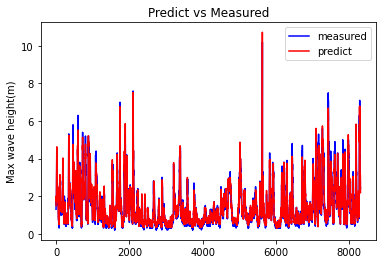

In [17]:
plt.plot(test_targets, 'b',label='measured')
plt.plot(predict_targets,'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Max wave height(m)')
plt.legend()

plt.show()

In [18]:
import numpy as np

In [19]:
predict_targets = predict_targets.flatten()
test_targets = test_targets.flatten()

In [20]:
np.savetxt('maxwave.txt',(test_targets,predict_targets))

In [21]:
result_csv = test_csv

In [22]:
result_csv['최대파고예측(m)'] = predict_targets

In [23]:
result_csv.to_csv('result/2019_result_maxwave.csv',encoding='utf-8-sig')

In [25]:
loss_data = history.history['loss']

In [26]:
np.savetxt('result/2019_result_maxwave_loss.txt',loss_data)